In [32]:
import pandas as pd
import pyensembl 

ensembl = pyensembl.cached_release(109)

# human protein atlas normal tissue expression
df_tissue = pd.read_csv("../hpa/v23/normal_tissue.tsv", sep="\t")
# human protein atlas sub-cellular locations
df_subcellular = pd.read_csv("../hpa/v23/subcellular_location.tsv", sep="\t")

In [3]:
len(df_tissue.Gene.unique())

15318

In [4]:
len(df_subcellular.Gene.unique())

13147

In [5]:
df_tissue.Gene

0          ENSG00000000003
1          ENSG00000000003
2          ENSG00000000003
3          ENSG00000000003
4          ENSG00000000003
                ...       
1194474    ENSG00000288607
1194475    ENSG00000288616
1194476    ENSG00000288631
1194477    ENSG00000288637
1194478    ENSG00000288684
Name: Gene, Length: 1194479, dtype: object

In [6]:
df_subcellular.Gene

0        ENSG00000000003
1        ENSG00000000457
2        ENSG00000000460
3        ENSG00000000938
4        ENSG00000000971
              ...       
13142    ENSG00000290292
13143    ENSG00000290315
13144    ENSG00000290317
13145    ENSG00000291237
13146    ENSG00000291316
Name: Gene, Length: 13147, dtype: object

In [7]:
testis_specific_gene_ids = set()
gene_ids_to_gene_names = {}

for i, (g, sub_df) in enumerate(sorted(df_tissue.groupby("Gene"))):
    gene_ids_to_gene_names[sub_df.iloc[0]["Gene"]] = sub_df.iloc[0]["Gene name"]
    no_mask = sub_df["Level"].isin({"Not detected"})
    low_mask = sub_df["Level"].isin({"Low"})
    yes_mask = sub_df["Level"].isin({"Medium", "High"}) 
    sub_df_no = sub_df[no_mask]
    sub_df_low = sub_df[low_mask]
    sub_df_yes = sub_df[yes_mask]
    no_tissues = set(sub_df_no["Tissue"])
    low_tissues = set(sub_df_low["Tissue"])
    yes_tissues = set(sub_df_yes["Tissue"])
    only_testis = {"testis"}
    if len(no_tissues) > 5 and (len(low_tissues) == 0 or low_tissues == only_testis) and yes_tissues == only_testis:
        # print("%s (%s): %s (%s)" % tuple(sub_df_yes[["Gene", "Gene name", "Cell type", "Level"]].iloc[0]))
        print("%s (%s)" % tuple(sub_df_yes[["Gene", "Gene name"]].iloc[0]))
        testis_specific_gene_ids.add(g)

ENSG00000001036 (FUCA2)
ENSG00000006047 (YBX2)
ENSG00000007350 (TKTL1)
ENSG00000010318 (PHF7)
ENSG00000033178 (UBA6)
ENSG00000039600 (SOX30)
ENSG00000042813 (ZPBP)
ENSG00000046774 (MAGEC2)
ENSG00000055957 (ITIH1)
ENSG00000064205 (CCN5)
ENSG00000064218 (DMRT3)
ENSG00000065320 (NTN1)
ENSG00000068985 (PAGE1)
ENSG00000071539 (TRIP13)
ENSG00000073146 (MOV10L1)
ENSG00000073598 (FNDC8)
ENSG00000075702 (WDR62)
ENSG00000077935 (SMC1B)
ENSG00000078403 (MLLT10)
ENSG00000079557 (AFM)
ENSG00000086288 (NME8)
ENSG00000092345 (DAZL)
ENSG00000099399 (MAGEB2)
ENSG00000100312 (ACR)
ENSG00000101251 (SEL1L2)
ENSG00000101448 (EPPIN)
ENSG00000101883 (RHOXF1)
ENSG00000102021 (LUZP4)
ENSG00000102387 (TAF7L)
ENSG00000102901 (CENPT)
ENSG00000103023 (PRSS54)
ENSG00000104332 (SFRP1)
ENSG00000104755 (ADAM2)
ENSG00000104901 (DKKL1)
ENSG00000104941 (RSPH6A)
ENSG00000105679 (GAPDHS)
ENSG00000105717 (PBX4)
ENSG00000105982 (RNF32)
ENSG00000106304 (SPAM1)
ENSG00000106336 (FBXO24)
ENSG00000107562 (CXCL12)
ENSG00000108691 

ENSG00000258484 (SPESP1)
ENSG00000258992 (TSPY1)
ENSG00000260097 (SPDYE6)
ENSG00000261587 (TMEM249)
ENSG00000268009 (SSX4)
ENSG00000268447 (SSX2B)
ENSG00000268651 (CTAG1A)
ENSG00000268738 (HSFX2)
ENSG00000269058 (CALR3)
ENSG00000269586 (CT45A10)
ENSG00000269791 (SSX4B)
ENSG00000271449 (CT45A2)
ENSG00000273513 (TBC1D3K)
ENSG00000273696 (CT45A7)
ENSG00000274226 (TBC1D3H)
ENSG00000274274 (GAGE13)
ENSG00000274391 (TPTE)
ENSG00000274512 (TBC1D3L)
ENSG00000274600 (RIMBP3B)
ENSG00000274808 (TBC1D3B)
ENSG00000274933 (TBC1D3I)
ENSG00000275113 (GAGE2E)
ENSG00000275722 (LYZL6)
ENSG00000275793 (RIMBP3)
ENSG00000277535 (AL772284.1)
ENSG00000278289 (CT45A6)
ENSG00000278299 (TBC1D3C)
ENSG00000278646 (AC008162.2)
ENSG00000283706 (PRSS50)
ENSG00000284701 (TMEM247)


In [8]:
print(len(testis_specific_gene_ids))
print(len(testis_specific_gene_ids.intersection(set(df_subcellular.Gene))))

404
206


In [9]:
len(testis_specific_gene_ids)

404

In [10]:
testis_specific_gene_names = {gene_ids_to_gene_names[g_id] for g_id in testis_specific_gene_ids}

In [11]:
"NUTM1" in testis_specific_gene_names

True

In [12]:
len(df_subcellular)

13147

In [13]:
df_subcellular[df_subcellular.Gene.isin(testis_specific_gene_ids)]["Main location"].value_counts()

Nucleoplasm                              42
Plasma membrane                          25
Cytosol                                  23
Vesicles                                 23
Nucleoli                                 15
Nucleoli;Nucleoplasm                     14
Cytosol;Nucleoplasm                      10
Mitochondria                              8
Golgi apparatus                           5
Nucleoplasm;Vesicles                      4
Nuclear speckles                          4
Plasma membrane;Vesicles                  3
Nucleoplasm;Plasma membrane               3
Nuclear bodies;Nucleoplasm                3
Cell Junctions                            2
Centrosome;Nucleoplasm                    2
Nucleoli;Nucleoli rim                     2
Endoplasmic reticulum                     2
Cytosol;Nuclear bodies                    2
Nuclear bodies                            2
Actin filaments;Plasma membrane           1
Nuclear membrane;Nucleoplasm              1
Actin filaments                 

In [14]:
df_subcellular[df_subcellular.Gene.isin(testis_specific_gene_ids)]["Main location"].value_counts().sum()

206

In [15]:
df_targets = df_subcellular[df_subcellular.Gene.isin(testis_specific_gene_ids) & df_subcellular["Main location"].str.contains("Plasma membrane", na=False)]

In [16]:
df_targets.to_csv("testis-specific-membrane-targets.csv", index=False)

In [17]:
df_targets

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
687,ENSG00000064205,CCN5,Approved,Plasma membrane,NaN,Predicted to be secreted,NaN,NaN,Plasma membrane,NaN,NaN,NaN,NaN,Plasma membrane (GO:0005886)
1139,ENSG00000079557,AFM,Uncertain,Plasma membrane,NaN,Predicted to be secreted,NaN,NaN,NaN,Plasma membrane,NaN,NaN,NaN,Plasma membrane (GO:0005886)
3511,ENSG00000117245,KIF17,Approved,Nucleoplasm;Plasma membrane,NaN,NaN,NaN,NaN,Nucleoplasm;Plasma membrane,NaN,NaN,NaN,NaN,Nucleoplasm (GO:0005654);Plasma membrane (GO:0...
3759,ENSG00000120156,TEK,Supported,Plasma membrane,Centriolar satellite,Predicted to be secreted,NaN,Plasma membrane,NaN,Centriolar satellite,Plasma membrane,NaN,NaN,Centriolar satellite (GO:0034451);Plasma membr...
3762,ENSG00000120160,EQTN,Approved,Actin filaments;Plasma membrane,NaN,Predicted to be secreted,NaN,NaN,Actin filaments;Plasma membrane,NaN,NaN,NaN,NaN,Actin filaments (GO:0015629);Plasma membrane (...
4682,ENSG00000130783,CCDC62,Uncertain,Plasma membrane,Nucleoplasm,NaN,NaN,Nucleoplasm,NaN,Plasma membrane,NaN,NaN,NaN,Nucleoplasm (GO:0005654);Plasma membrane (GO:0...
4776,ENSG00000131721,RHOXF2,Approved,Plasma membrane,Nucleoplasm,NaN,NaN,NaN,Nucleoplasm;Plasma membrane,NaN,Nucleoplasm;Plasma membrane,NaN,NaN,Nucleoplasm (GO:0005654);Plasma membrane (GO:0...
4795,ENSG00000131864,USP29,Supported,Plasma membrane,Cytosol,NaN,NaN,Plasma membrane,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829);Plasma membrane (GO:0005886)
6988,ENSG00000152670,DDX4,Approved,Cytosol;Nucleoplasm;Plasma membrane,NaN,NaN,NaN,NaN,Cytosol;Nucleoplasm;Plasma membrane,NaN,NaN,NaN,NaN,Cytosol (GO:0005829);Nucleoplasm (GO:0005654);...
7352,ENSG00000157343,ARMC12,Approved,Nucleoplasm;Plasma membrane,NaN,NaN,NaN,Nucleoplasm,NaN,Plasma membrane,NaN,NaN,NaN,Nucleoplasm (GO:0005654);Plasma membrane (GO:0...


In [18]:
len(df_targets)

35

In [482]:
e109 = pyensembl.cached_release(109)
_missing = set()
_unique_transcript_ids = set()
_transcript_to_gene = {}

def get_gene(t_id):
    g_id = None
    if t_id in _transcript_to_gene:
        g_id = _transcript_to_gene[t_id]
    else:
        _unique_transcript_ids.add(t_id)
        try:
            t_id_no_version = t_id.split(".")[0]
            t = e109.transcript_by_id(t_id_no_version)
            if t:
                g_id = t.gene_id
        except:
            pass
        transcript_to_gene[t_id] = transcript_to_gene[t_id_no_version] = g_id
        if not g_id:
            _missing.add(t_id)
    return g_id

vals = []
def groupby_genes(df):
    return df.groupby("Gene").aggregate({
        "Name":  ";".join,
        "EffectiveLength": "mean",
        "Length": "mean",
        "NumReads": "sum",
        "TPM": "sum"})


def load_df(filename, transcript_column_name="Name"):
    print("Loading %s" % filename)
    df = pd.read_csv(filename, sep="\t")
    df["Gene"] = df[transcript_column_name].map(lambda x: get_gene(x))
    df_grouped = groupby_genes(df)
    df_grouped["GeneName"] = [
        e109.gene_name_of_gene_id(g_id) if g_id else None  for g_id in df_grouped.index 
    ]
    return df_grouped


# load cell line RNA-seq
cell_lines = {"14169", "1015", "797"}
cell_lines_files = {name: "NUTM1-%s-ar-%s.quant.sf" % (name, name) for name in cell_lines}
cell_line_paths = {name: "rna-quant-ensembl-109/" + filename for (name, filename) in cell_lines_files.items()}
cell_line_dfs = {name: load_df(path) for (name, path) in cell_line_paths.items()}
total = len(_unique_transcript_ids)
success = total - len(missing)
    

print("Found genes for %d/%d transcripts" % (success, total))

Loading rna-quant-ensembl-109/NUTM1-797-ar-797.quant.sf
Loading rna-quant-ensembl-109/NUTM1-14169-ar-14169.quant.sf
Loading rna-quant-ensembl-109/NUTM1-1015-ar-1015.quant.sf
Found genes for 252913/252913 transcripts


In [483]:
cell_line_dfs['797']

,Name,EffectiveLength,Length,NumReads,TPM,GeneName
Gene,,,,,,
ENSG00000000003,ENST00000373020.9;ENST00000612152.4;ENST000006...,1896.164000,2061.800000,828.000,11.522831,TSPAN6
ENSG00000000005,ENST00000373031.5;ENST00000485971.1,708.000000,873.500000,0.000,0.000000,TNMD
ENSG00000000419,ENST00000466152.5;ENST00000371582.8;ENST000006...,1268.789062,1434.437500,1663.000,79.638313,DPM1
ENSG00000000457,ENST00000367771.11;ENST00000367770.5;ENST00000...,3020.131000,3185.800000,344.809,5.043284,SCYL3
ENSG00000000460,ENST00000498289.5;ENST00000472795.5;ENST000003...,2265.486333,2431.111111,803.191,18.452290,C1orf112
...,...,...,...,...,...,...
ENSG00000291313,ENST00000706947.1,475.508000,641.000000,64.488,5.894114,
ENSG00000291314,ENST00000706950.1,722.398000,888.000000,0.000,0.000000,
ENSG00000291315,ENST00000706951.1,20.936000,129.000000,0.000,0.000000,


In [484]:
cell_line_names = set(cell_line_dfs.keys())
cell_line_names_list = sorted(cell_line_names)

In [485]:
first_name = cell_line_names_list[0]

combined_df = cell_line_dfs[first_name].copy()

for k in cell_line_names:
    combined_df[k] = grouped_by_genes[k].TPM
del combined_df['TPM']
combined_df["MinTPM"] = combined_df[list(cell_line_names)].min(axis=1)
combined_df["MaxTPM"] = combined_df[list(cell_line_names)].max(axis=1)
combined_df["MeanTPM"] = combined_df[list(cell_line_names)].mean(axis=1)
combined_df["MedianTPM"] = combined_df[list(cell_line_names)].median(axis=1)


In [486]:
combined_df.sort_values("MinTPM", ascending=False)

,Name,EffectiveLength,Length,NumReads,GeneName,797,14169,1015,MinTPM,MaxTPM,MeanTPM,MedianTPM
Gene,,,,,,,,,,,,
ENSG00000156508,ENST00000676547.1;ENST00000423099.1;ENST000003...,2071.306348,2245.478261,278154.268,EEF1A1,10237.735777,10437.239231,10880.130504,10237.735777,10880.130504,10518.368504,10437.239231
ENSG00000198938,ENST00000362079.2,609.820000,784.000000,95813.991,MT-CO3,10104.602649,8597.889070,10087.664795,8597.889070,10104.602649,9596.718838,10087.664795
ENSG00000198712,ENST00000361739.1,509.846000,684.000000,81833.988,MT-CO2,10072.056651,7179.751667,10305.233110,7179.751667,10305.233110,9185.680476,10072.056651
ENSG00000198804,ENST00000361624.2,1367.714000,1542.000000,195326.151,MT-CO1,7255.398962,6892.362060,9169.132998,6892.362060,9169.132998,7772.298007,7255.398962
ENSG00000228253,ENST00000361851.1,60.187000,207.000000,9102.000,MT-ATP8,8362.484117,5708.645197,9709.560012,5708.645197,9709.560012,7926.896442,8362.484117
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000230641,ENST00000452222.1,114.995000,279.000000,1.000,USP12-DT,0.000000,0.000000,0.558322,0.000000,0.558322,0.186107,0.000000
ENSG00000230643,ENST00000447704.1,15.650000,118.000000,0.000,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000230645,ENST00000659082.1;ENST00000665690.1;ENST000004...,817.280667,990.666667,0.000,LINC01818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [487]:
def highest_level(levels, sorted_levels=["High", "Medium", "Low", "Not detected"]):
    if not levels:
        return "Unkown"
    for level in sorted_levels:
        if level in levels:
            return level
    return "Unknown"


import progressbar

genes_in_tissue = set(df_tissue.Gene)
testis_mask = df_tissue.Tissue == "testis"
df_tissue_testis = df_tissue[testis_mask]
df_tissue_not_testis = df_tissue[~testis_mask]

grouped_gene_levels_testis = df_tissue_testis.groupby("Gene")["Level"].agg(set)
grouped_gene_levels_not_testis = df_tissue_not_testis.groupby("Gene")["Level"].agg(set)
testis_levels = []
not_testis_levels = []

for g_id in progressbar.ProgressBar()(combined_df.index):
    if g_id not in genes_in_tissue:
        testis_hpa = "Unknown"
        not_testis_hpa = "Unknown"
    else:
        testis_hpa = highest_level(grouped_gene_levels_testis.get(g_id))
        not_testis_hpa = highest_level(grouped_gene_levels_not_testis.get(g_id))
    testis_levels.append(testis_hpa)
    not_testis_levels.append(not_testis_hpa)

combined_df["TestisHPA"] = testis_levels
combined_df["NotTestisHPA"] = not_testis_levels


100% (62656 of 62656) |##################| Elapsed Time: 0:00:00 Time:  0:00:00


In [488]:
grouped_gene_levels_testis.get("ENST00000588030")

In [489]:
combined_df["TestisOnly"] = combined_df.TestisHPA.isin({"Low", "Medium", "High"}) & (combined_df.NotTestisHPA == "Not detected")

In [490]:


combined_df["DiffTPM"] = combined_df.MaxTPM - combined_df.MinTPM
combined_df.sort_values("DiffTPM", ascending=False)



,Name,EffectiveLength,Length,NumReads,GeneName,797,14169,1015,MinTPM,MaxTPM,MeanTPM,MedianTPM,TestisHPA,NotTestisHPA,TestisOnly,DiffTPM
Gene,,,,,,,,,,,,,,,,
ENSG00000111341,ENST00000539261.6;ENST00000545199.5;ENST000002...,846.793750,1020.750000,84765.001,MGP,2.242258,6.844302,9245.894977,2.242258,9245.894977,3084.993846,6.844302,Not detected,High,False,9243.652719
ENSG00000130600,ENST00000414790.8;ENST00000431095.7;ENST000004...,1372.990133,1547.200000,200.000,H19,22.169166,4616.012806,6.642529,6.642529,4616.012806,1548.274834,22.169166,Unknown,Unknown,False,4609.370277
ENSG00000228253,ENST00000361851.1,60.187000,207.000000,9102.000,MT-ATP8,8362.484117,5708.645197,9709.560012,5708.645197,9709.560012,7926.896442,8362.484117,Unknown,Unknown,False,4000.914815
ENSG00000133636,ENST00000551529.5;ENST00000256010.7;ENST000005...,878.414333,1052.666667,47873.000,NTS,6370.582281,6072.638151,2900.873176,2900.873176,6370.582281,5114.697869,6072.638151,Not detected,High,False,3469.709105
ENSG00000163631,ENST00000441319.5;ENST00000621628.4;ENST000005...,908.647150,1081.800000,71810.000,ALB,0.000000,0.988020,3431.463095,0.000000,3431.463095,1144.150372,0.988020,Not detected,Medium,False,3431.463095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000235256,ENST00000433874.1,1188.714000,1363.000000,0.000,FKBP4P7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Unknown,Unknown,False,0.000000
ENSG00000235258,ENST00000436819.1,194.502000,366.000000,0.000,NDUFB4P6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Unknown,Unknown,False,0.000000
ENSG00000235262,ENST00000412242.1,580.830000,755.000000,0.000,KDM5C-IT1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Unknown,Unknown,False,0.000000


In [491]:
print(len(combined_df))
combined_df = pd.merge(combined_df, df_subcellular, left_on='Gene', right_on='Gene', how='left')

combined_df["ER"] = combined_df["Main location"].str.contains("reticulum", na=False)
combined_df["Membrane"] = combined_df["Main location"].str.contains("membrane", na=False)
combined_df["ImportantLocation"] = [
    "ER" if er else "Membrane" if membrane else "Other"
    for (er, membrane) in zip(combined_df["ER"], combined_df["Membrane"])
]



62656


In [492]:

nonzero = combined_df[combined_df.MinTPM > 0]
print(len(nonzero), len(combined_df))


17238 62656


In [493]:
nonzero.ImportantLocation.value_counts()

Other       15727
Membrane     1133
ER            378
Name: ImportantLocation, dtype: int64

In [494]:

import seaborn 
cell_line_names_list = sorted(cell_line_names)

In [495]:
%matplotlib inline

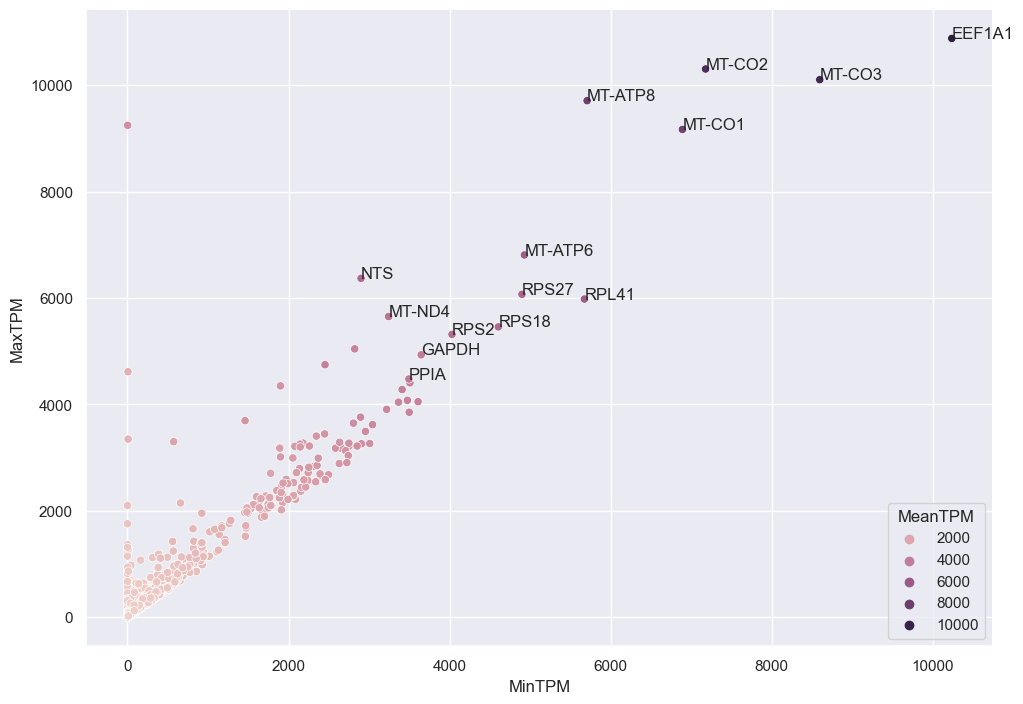

In [496]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

sns.set(rc={'figure.figsize':(11.7,8.27)})
varlist = [ 'MinTPM', 'MaxTPM']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        fig = plt.figure()
        ax = seaborn.scatterplot(nonzero, x=x, y=y, hue='MeanTPM')
        high = nonzero[nonzero.MeanTPM > 4000]
        for gene_name, xi, yi in zip(high.GeneName, high[x], high[y]):
            ax.text(x=xi+1, y=yi-1, s=gene_name)
        fig.savefig("%s-%s.png" % (x, y))

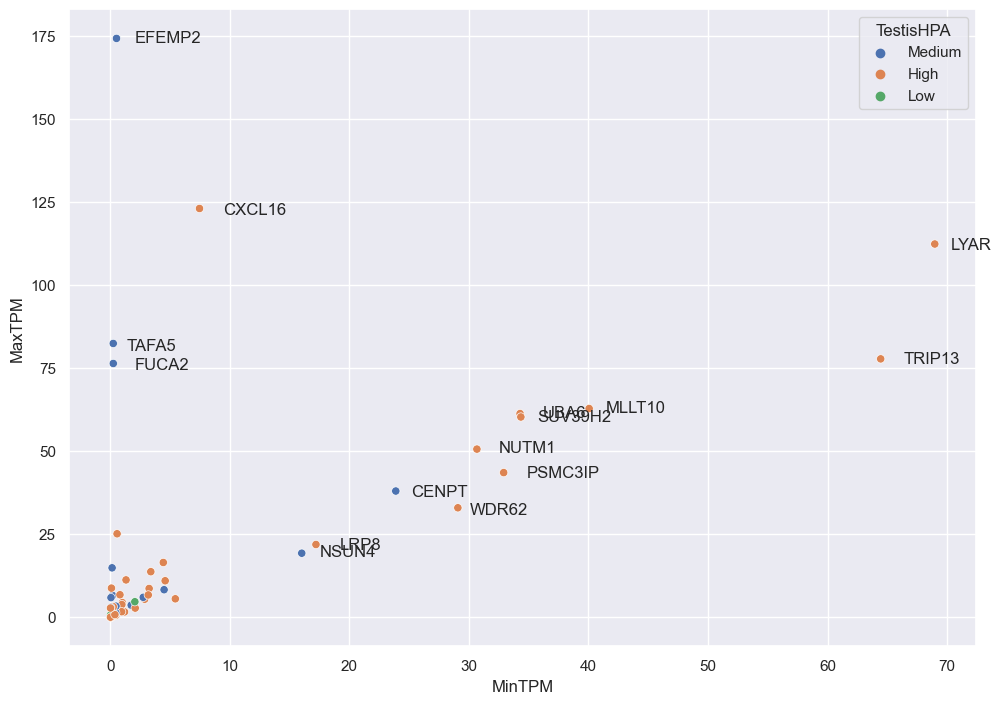

In [497]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

testis_specific =nonzero[nonzero.TestisOnly]
sns.set(rc={'figure.figsize':(11.7,8.27)})
varlist = [ 'MinTPM', 'MaxTPM']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        fig = plt.figure()
        ax = seaborn.scatterplot(testis_specific, x=x, y=y, hue='TestisHPA')
        high = testis_specific[testis_specific.MeanTPM > 10]
        for gene_name, xi, yi in zip(high.GeneName, high[x], high[y]):
            ax.text(x=xi+1 + np.random.rand(), y=yi-(1 + np.random.rand()), s=gene_name)
        fig.savefig("TestisSpecific-%s-%s.png" % (x, y))

In [498]:
nonzero['Main location'].value_counts()[:30]

Nucleoplasm                      2810
Cytosol                          1341
Vesicles                          730
Mitochondria                      708
Plasma membrane                   429
Golgi apparatus                   391
Cytosol;Nucleoplasm               375
Cytosol;Plasma membrane           258
Nuclear speckles                  258
Endoplasmic reticulum             255
Nucleoli                          202
Nucleoli;Nucleoplasm              131
Nuclear bodies                    122
Centrosome                        108
Microtubules                      103
Nuclear bodies;Nucleoplasm         97
Nucleoplasm;Vesicles               89
Cytosol;Vesicles                   77
Nucleoli fibrillar center          75
Nucleoplasm;Plasma membrane        71
Golgi apparatus;Vesicles           71
Cell Junctions                     65
Nuclear membrane                   64
Cytosol;Endoplasmic reticulum      64
Mitochondria;Nucleoplasm           59
Golgi apparatus;Nucleoplasm        53
Nucleoli;Nuc

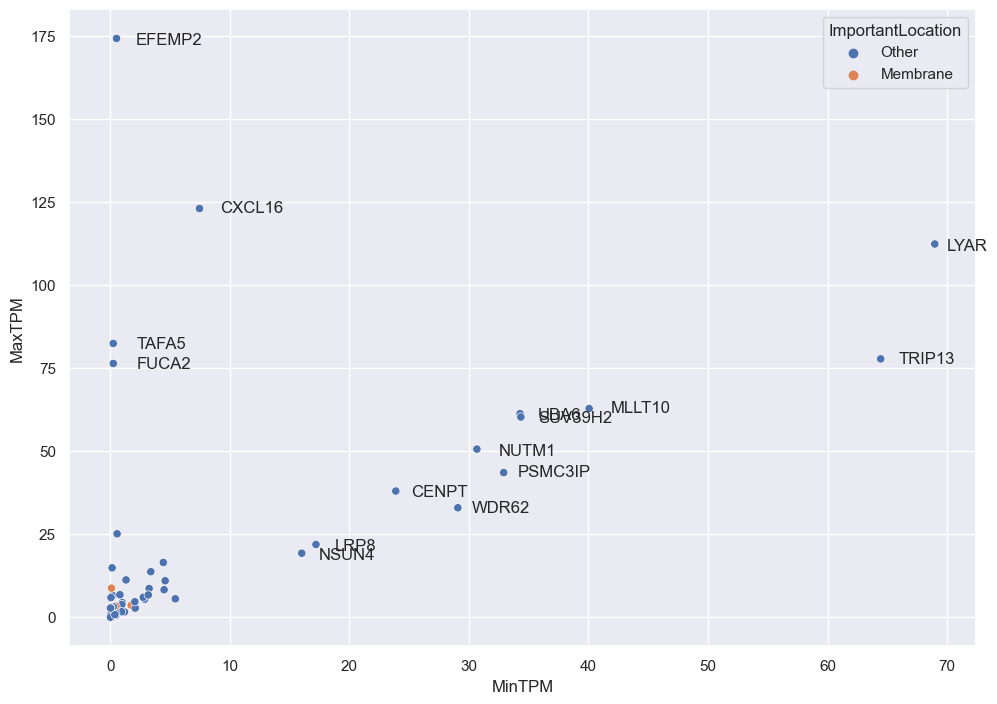

In [499]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

testis_specific =nonzero[nonzero.TestisOnly]
sns.set(rc={'figure.figsize':(11.7,8.27)})
varlist = [ 'MinTPM', 'MaxTPM']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        fig = plt.figure()
        ax = seaborn.scatterplot(testis_specific, x=x, y=y, hue='ImportantLocation')
        high = testis_specific[testis_specific.MeanTPM > 10]
        for gene_name, xi, yi in zip(high.GeneName, high[x], high[y]):
            ax.text(x=xi+1 + np.random.rand(), y=yi-(1 + np.random.rand()), s=gene_name)
        fig.savefig("Location-%s-%s.png" % (x, y))

In [500]:
import glob
thymic_dfs = {}
for f in glob.glob("rna-quant-ensembl-109/*SRR*quant.sf"):
    thymic_dfs[f] = load_df(f)

Loading rna-quant-ensembl-109/Larouche_et_al_Genome_Medicine_2020-NA-nr-SRR8668635.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668632.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668633.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668611.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668625.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668624.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668628.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668629.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translational_Medicine_2018-NA-nr-SRR8668616.quant.sf
Loading rna-quant-ensembl-109/Laumont_et_al_Science_Translat

In [501]:
thymic_long_to_short_names = {}
thymic_short_to_long_names = {}

thymic_dfs_short = {}
for name, df in thymic_dfs.items():
    short = name.split("-")[-1].split(".")[0]
    thymic_long_to_short_names[name] = short
    thymic_short_to_long_names[short] = name
    df = df.copy()
    df["Source"] = short 
    thymic_dfs_short[short] = df
thymic_dfs_short

{'SRR8668635':                                                               Name  \
 Gene                                                                 
 ENSG00000000003  ENST00000373020.9;ENST00000612152.4;ENST000006...   
 ENSG00000000005                ENST00000373031.5;ENST00000485971.1   
 ENSG00000000419  ENST00000466152.5;ENST00000371582.8;ENST000006...   
 ENSG00000000457  ENST00000367771.11;ENST00000367770.5;ENST00000...   
 ENSG00000000460  ENST00000498289.5;ENST00000472795.5;ENST000003...   
 ...                                                            ...   
 ENSG00000291313                                  ENST00000706947.1   
 ENSG00000291314                                  ENST00000706950.1   
 ENSG00000291315                                  ENST00000706951.1   
 ENSG00000291316                ENST00000438911.6;ENST00000526887.5   
 ENSG00000291317  ENST00000403000.6;ENST00000424149.6;ENST000003...   
 
                  EffectiveLength       Length  NumReads     

In [502]:
nonzero[nonzero.TestisOnly & (nonzero.MinTPM > 20)][['GeneName', 'MeanTPM']]

,GeneName,MeanTPM
502,UBA6,49.120385
1155,TRIP13,69.069383
1319,WDR62,31.146550
1424,MLLT10,49.952801
2722,CENPT,32.832192
6448,PSMC3IP,39.894806
8662,LYAR,95.123319
9531,SUV39H2,44.018092
15731,NUTM1,41.638436


In [503]:
df_thymic_concat = pd.concat(thymic_dfs_short.values())
df_thymic_concat

,Name,EffectiveLength,Length,NumReads,TPM,GeneName,Source
Gene,,,,,,,
ENSG00000000003,ENST00000373020.9;ENST00000612152.4;ENST000006...,1902.879200,2061.800000,1383.000,20.741907,TSPAN6,SRR8668635
ENSG00000000005,ENST00000373031.5;ENST00000485971.1,714.749000,873.500000,10.000,0.530430,TNMD,SRR8668635
ENSG00000000419,ENST00000466152.5;ENST00000371582.8;ENST000006...,1275.482000,1434.437500,1589.999,60.281086,DPM1,SRR8668635
ENSG00000000457,ENST00000367771.11;ENST00000367770.5;ENST00000...,3026.800000,3185.800000,797.000,8.287587,SCYL3,SRR8668635
ENSG00000000460,ENST00000498289.5;ENST00000472795.5;ENST000003...,2272.211111,2431.111111,349.001,5.468249,C1orf112,SRR8668635
...,...,...,...,...,...,...,...
ENSG00000291313,ENST00000706947.1,494.310000,641.000000,43.354,10.963580,,SRR8668614
ENSG00000291314,ENST00000706950.1,741.197000,888.000000,0.000,0.000000,,SRR8668614
ENSG00000291315,ENST00000706951.1,32.421000,129.000000,0.000,0.000000,,SRR8668614


In [504]:
df_thymic_pivot = df_thymic_concat.pivot(columns=["Source"], values=["TPM"]).reset_index().set_index("Gene")
df_thymic_pivot.columns = list(df_thymic_pivot.columns.get_level_values(1))
df_thymic_pivot

,SRR8668611,SRR8668612,SRR8668613,SRR8668614,SRR8668615,SRR8668616,SRR8668617,SRR8668618,SRR8668619,SRR8668620,...,SRR8668629,SRR8668630,SRR8668631,SRR8668632,SRR8668633,SRR8668634,SRR8668635,SRR8668636,SRR8668637,SRR8668638
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,8.417971,10.132434,11.488394,10.377077,17.064307,14.255464,15.091153,14.560361,11.858160,12.770380,...,10.190071,9.891216,13.711427,11.901529,12.165105,12.518658,20.741907,20.850014,21.064733,21.149241
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232236,0.332306,...,0.000000,0.000000,0.142189,0.285974,0.141586,0.287470,0.530430,0.541851,0.461840,0.455767
ENSG00000000419,28.148246,24.844134,36.178988,28.562388,36.775414,38.537589,34.332150,35.641671,55.281714,52.492421,...,33.448120,29.916446,42.909838,41.831823,46.910306,45.517949,60.281086,62.185770,60.965916,62.002527
ENSG00000000457,9.110402,8.536852,9.608688,9.212112,11.406515,12.450669,12.453668,14.114520,8.782765,6.500284,...,5.146471,6.094818,7.534626,7.582135,7.434554,8.171161,8.287587,8.793114,9.515447,9.001719
ENSG00000000460,3.664641,3.726440,4.853204,4.196309,2.535865,2.700660,2.894636,2.987773,4.847035,5.343870,...,1.772890,1.726116,3.621674,3.650687,3.617972,3.673475,5.468249,5.496397,5.102545,4.658424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000291313,12.583165,13.582674,19.441869,10.963580,31.254587,30.802131,34.519361,30.152795,0.000000,28.753558,...,10.592639,3.918770,25.809836,26.509210,23.566619,21.594912,14.736152,12.385563,13.392032,15.942517
ENSG00000291314,0.000000,0.000000,0.000000,0.000000,8.496957,6.437804,7.657550,5.294879,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000291315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [505]:
def iqr(df, axis=1):
    return df.quantile(0.75, axis=axis) - df.quantile(0.25, axis=axis)

summary_stats = [
    pd.DataFrame.mean,
    pd.DataFrame.std,
    pd.DataFrame.min,
    pd.DataFrame.max,
    pd.DataFrame.median,
    iqr,
]

columns = {}
for fn in summary_stats:
    fn_name = fn.__name__
    col_name = "ThymicTPM_%s" % (fn_name)
    columns[col_name] = fn(df_thymic_pivot, axis=1)
df_thymic_summary = pd.DataFrame(columns)
df_thymic_summary

,ThymicTPM_mean,ThymicTPM_std,ThymicTPM_min,ThymicTPM_max,ThymicTPM_median,ThymicTPM_iqr
Gene,,,,,,
ENSG00000000003,13.616112,3.509107,8.417971,21.149241,12.514884,2.565970
ENSG00000000005,0.204870,0.220014,0.000000,0.729277,0.158836,0.353776
ENSG00000000419,44.106824,11.388232,24.844134,62.185770,44.213893,18.335000
ENSG00000000457,8.452106,2.114078,5.146471,14.114520,8.298421,1.894029
ENSG00000000460,3.901522,1.152694,1.726116,5.496397,3.750123,1.906119
...,...,...,...,...,...,...
ENSG00000291313,16.932196,11.395251,0.000000,34.519361,15.339334,18.405971
ENSG00000291314,0.995971,2.527937,0.000000,8.496957,0.000000,0.000000
ENSG00000291315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [506]:
combined_with_thymus = combined_df.join(df_thymic_summary, on="Gene").set_index("Gene")

In [507]:
combined_with_thymus

,Name,EffectiveLength,Length,NumReads,GeneName,797,14169,1015,MinTPM,MaxTPM,...,GO id,ER,Membrane,ImportantLocation,ThymicTPM_mean,ThymicTPM_std,ThymicTPM_min,ThymicTPM_max,ThymicTPM_median,ThymicTPM_iqr
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,ENST00000373020.9;ENST00000612152.4;ENST000006...,1887.546000,2061.800000,1058.000,TSPAN6,11.522831,13.228656,25.570779,11.522831,25.570779,...,Cell Junctions (GO:0030054);Cytosol (GO:000582...,False,False,Other,13.616112,3.509107,8.417971,21.149241,12.514884,2.565970
ENSG00000000005,ENST00000373031.5;ENST00000485971.1,699.352500,873.500000,0.000,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,False,False,Other,0.204870,0.220014,0.000000,0.729277,0.158836,0.353776
ENSG00000000419,ENST00000466152.5;ENST00000371582.8;ENST000006...,1260.170000,1434.437500,923.000,DPM1,79.638313,64.671257,66.970671,64.671257,79.638313,...,NaN,False,False,Other,44.106824,11.388232,24.844134,62.185770,44.213893,18.335000
ENSG00000000457,ENST00000367771.11;ENST00000367770.5;ENST00000...,3011.514000,3185.800000,213.000,SCYL3,5.043284,7.498072,4.053443,4.053443,7.498072,...,Cytosol (GO:0005829);Golgi apparatus (GO:0005794),False,False,Other,8.452106,2.114078,5.146471,14.114520,8.298421,1.894029
ENSG00000000460,ENST00000498289.5;ENST00000472795.5;ENST000003...,2256.867444,2431.111111,452.000,C1orf112,18.452290,15.027351,15.480727,15.027351,18.452290,...,Mitochondria (GO:0005739),False,False,Other,3.901522,1.152694,1.726116,5.496397,3.750123,1.906119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000291313,ENST00000706947.1,466.871000,641.000000,0.000,,5.894114,0.000000,0.000000,0.000000,5.894114,...,NaN,False,False,Other,16.932196,11.395251,0.000000,34.519361,15.339334,18.405971
ENSG00000291314,ENST00000706950.1,713.781000,888.000000,0.000,,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,False,False,Other,0.995971,2.527937,0.000000,8.496957,0.000000,0.000000
ENSG00000291315,ENST00000706951.1,18.813000,129.000000,0.000,,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,False,False,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


     CENPT  24 (min TPM)
     WDR62  29 (min TPM)
     NUTM1  31 (min TPM)
   PSMC3IP  33 (min TPM)
      UBA6  34 (min TPM)
   SUV39H2  34 (min TPM)
    MLLT10  40 (min TPM)
    TRIP13  64 (min TPM)
      LYAR  69 (min TPM)


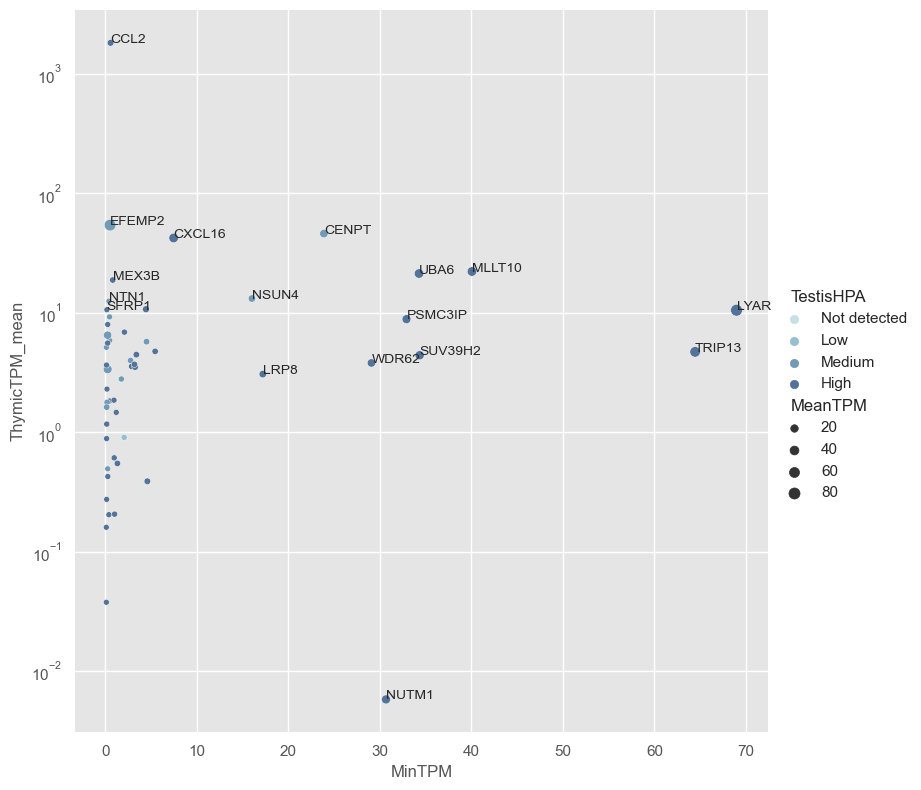

In [564]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

combined_with_thymus["MinTPM"] += 0.0001
combined_with_thymus["ThymicTPM_median"] += 0.0001

df_plot = combined_with_thymus[combined_with_thymus.TestisOnly & (combined_with_thymus.MinTPM > 0.1)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.cubehelix_palette(rot=-.2))
    
varlist = [ 'MinTPM', 'ThymicTPM_mean']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        # fig = plt.figure(figsize=(20,16))
        g = sns.relplot(
            data=df_plot,
            x=x, y=y,
            hue="TestisHPA", size="MeanTPM",
            hue_order=["Not detected", "Low", "Medium", "High"],
            height=8,
           
        )
   
        g.set(xscale="linear", yscale="log")
        ax = g.ax
        ax.xaxis.grid(True, "minor", linewidth=.25)
        # g.ax.yaxis.grid(True, "minor", linewidth=.25)
        g.despine(left=True, bottom=True)
        high = df_plot[
            (df_plot.MinTPM > 10) | 
        
            (df_plot.ThymicTPM_median > 10)]
        for gene_name, xi, yi in sorted(zip(high.GeneName, high[x], high[y]), key=lambda x: x[1]):
            if xi > 20:
                print("%10s  %d (min TPM)" % (gene_name, int(np.round(xi))))
            ax.text(
                x=xi, 
                y=yi, 
                s=gene_name)
        fig = g.figure
        fig.savefig("TestisOnly-Thymic-%s-%s.png" % (x, y))

     MRTO4  101 (min TPM)
   S100A13  102 (min TPM)
     GIPC1  103 (min TPM)
      MTPN  103 (min TPM)
   RANGAP1  105 (min TPM)
      PRC1  108 (min TPM)
     SUMO1  110 (min TPM)
     WDR12  112 (min TPM)
     PHGDH  112 (min TPM)
      FASN  114 (min TPM)
     RAB13  117 (min TPM)
      XPO1  117 (min TPM)
      EPN1  117 (min TPM)
     TRIP6  126 (min TPM)
     ADRM1  127 (min TPM)
      CTTN  129 (min TPM)
       EMD  135 (min TPM)
    SLC1A5  135 (min TPM)
      DBN1  140 (min TPM)
      MAP4  141 (min TPM)
     SURF4  149 (min TPM)
     CPNE1  149 (min TPM)
      JPT2  152 (min TPM)
   CCDC124  152 (min TPM)
     DUS1L  155 (min TPM)
      BZW2  156 (min TPM)
     FSCN1  164 (min TPM)
      ENAH  166 (min TPM)
    SEC11A  167 (min TPM)
     CERS2  167 (min TPM)
     LMNB1  170 (min TPM)
      MYH9  182 (min TPM)
     LMNB2  182 (min TPM)
      GUK1  184 (min TPM)
    PPP1CA  185 (min TPM)
    STOML2  187 (min TPM)
     PSMC5  187 (min TPM)
     ITGB1  189 (min TPM)
    METAP2  

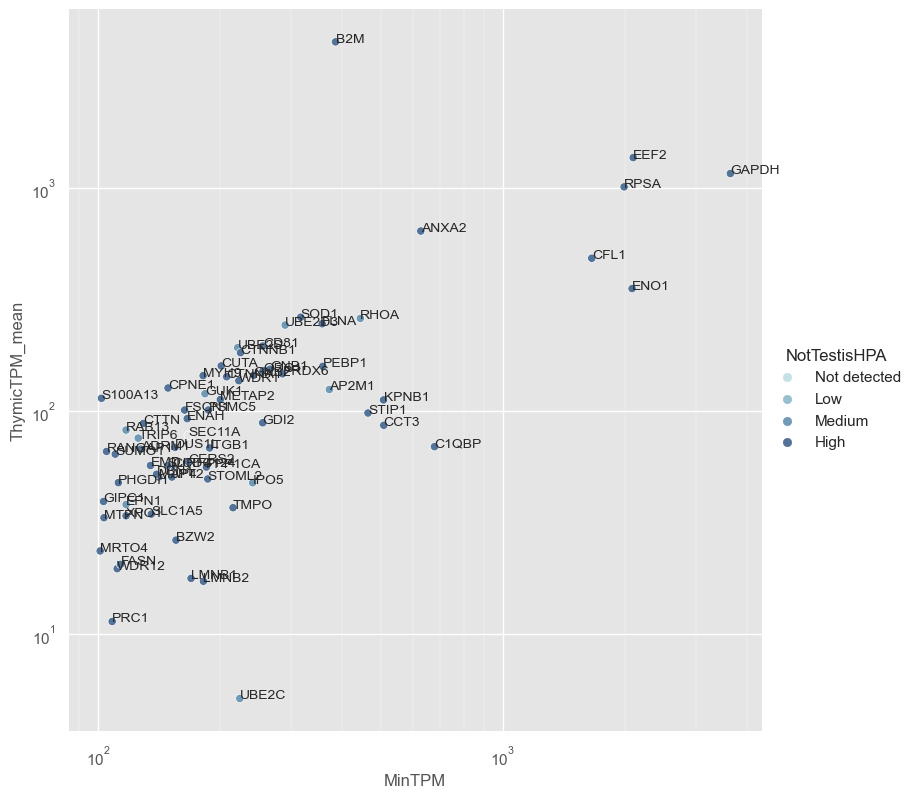

In [583]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

combined_with_thymus["MinTPM"] += 0.0001
combined_with_thymus["ThymicTPM_median"] += 0.0001

df_plot = combined_with_thymus[combined_with_thymus.Membrane & (combined_with_thymus.MinTPM > 100)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.cubehelix_palette(rot=-.2))
    
varlist = [ 'MinTPM', 'ThymicTPM_mean']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        # fig = plt.figure(figsize=(20,16))
        g = sns.relplot(
            data=df_plot,
            x=x, y=y,
            hue="NotTestisHPA", #size="MeanTPM",
            hue_order=["Not detected", "Low", "Medium", "High"],
            height=8,
           
        )
   
        g.set(xscale="log", yscale="log")
        ax = g.ax
        ax.xaxis.grid(True, "minor", linewidth=.25)
        # g.ax.yaxis.grid(True, "minor", linewidth=.25)
        g.despine(left=True, bottom=True)
        high = df_plot[
            (df_plot.MinTPM > 100)]
        for gene_name, xi, yi in sorted(zip(high.GeneName, high[x], high[y]), key=lambda x: x[1]):
            if xi > 20:
                print("%10s  %d (min TPM)" % (gene_name, int(np.round(xi))))
            ax.text(
                x=xi, 
                y=yi, 
                s=gene_name)
        fig = g.figure
        fig.savefig("Membrane-%s-%s.png" % (x, y))

In [533]:
combined_with_thymus.columns

Index(['Name', 'EffectiveLength', 'Length', 'NumReads', 'GeneName', '797',
       '14169', '1015', 'MinTPM', 'MaxTPM', 'MeanTPM', 'MedianTPM',
       'TestisHPA', 'NotTestisHPA', 'TestisOnly', 'DiffTPM', 'Gene name',
       'Reliability', 'Main location', 'Additional location',
       'Extracellular location', 'Enhanced', 'Supported', 'Approved',
       'Uncertain', 'Single-cell variation intensity',
       'Single-cell variation spatial', 'Cell cycle dependency', 'GO id', 'ER',
       'Membrane', 'ImportantLocation', 'ThymicTPM_mean', 'ThymicTPM_std',
       'ThymicTPM_min', 'ThymicTPM_max', 'ThymicTPM_median', 'ThymicTPM_iqr'],
      dtype='object')

In [545]:
df_thymic_concat.Source.value_counts().index

Index(['SRR8668635', 'SRR8668632', 'SRR8668615', 'SRR8668620', 'SRR8668621',
       'SRR8668630', 'SRR8668631', 'SRR8668637', 'SRR8668636', 'SRR8668613',
       'SRR8668612', 'SRR8668619', 'SRR8668618', 'SRR8668627', 'SRR8668626',
       'SRR8668634', 'SRR8668638', 'SRR8668623', 'SRR8668622', 'SRR8668617',
       'SRR8668616', 'SRR8668629', 'SRR8668628', 'SRR8668624', 'SRR8668625',
       'SRR8668611', 'SRR8668633', 'SRR8668614'],
      dtype='object')

In [576]:
df_plot.columns

Index(['Name', 'EffectiveLength', 'Length', 'NumReads', 'GeneName', '797',
       '14169', '1015', 'MinTPM', 'MaxTPM', 'MeanTPM', 'MedianTPM',
       'TestisHPA', 'NotTestisHPA', 'TestisOnly', 'DiffTPM', 'Gene name',
       'Reliability', 'Main location', 'Additional location',
       'Extracellular location', 'Enhanced', 'Supported', 'Approved',
       'Uncertain', 'Single-cell variation intensity',
       'Single-cell variation spatial', 'Cell cycle dependency', 'GO id', 'ER',
       'Membrane', 'ImportantLocation', 'ThymicTPM_mean', 'ThymicTPM_std',
       'ThymicTPM_min', 'ThymicTPM_max', 'ThymicTPM_median', 'ThymicTPM_iqr'],
      dtype='object')

In [585]:
combined_with_thymus[combined_with_thymus.GeneName == "CD276"]

,Name,EffectiveLength,Length,NumReads,GeneName,797,14169,1015,MinTPM,MaxTPM,...,GO id,ER,Membrane,ImportantLocation,ThymicTPM_mean,ThymicTPM_std,ThymicTPM_min,ThymicTPM_max,ThymicTPM_median,ThymicTPM_iqr
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000103855,ENST00000567189.5;ENST00000537340.6;ENST000003...,1097.387632,1271.526316,1793.001,CD276,29.878471,138.028382,52.646429,29.884371,138.028382,...,Vesicles (GO:0043231),False,False,Other,22.158809,8.694758,15.976301,46.099151,19.39121,2.874149


    HOTAIR  20 (min TPM)
     ESCO2  21 (min TPM)
     CDCA2  21 (min TPM)
    KIF18B  22 (min TPM)
 GATA2-AS1  23 (min TPM)
     KIF4A  23 (min TPM)
    HOXC11  24 (min TPM)
     CENPA  26 (min TPM)
   DEPDC1B  27 (min TPM)
      HPDL  27 (min TPM)
     CPNE7  31 (min TPM)
      SKA3  31 (min TPM)
     NUTM1  31 (min TPM)
   IGF2BP3  36 (min TPM)
    HOXC10  38 (min TPM)
      ETV4  51 (min TPM)
    CASC19  60 (min TPM)
       NPW  128 (min TPM)
       NTS  2901 (min TPM)


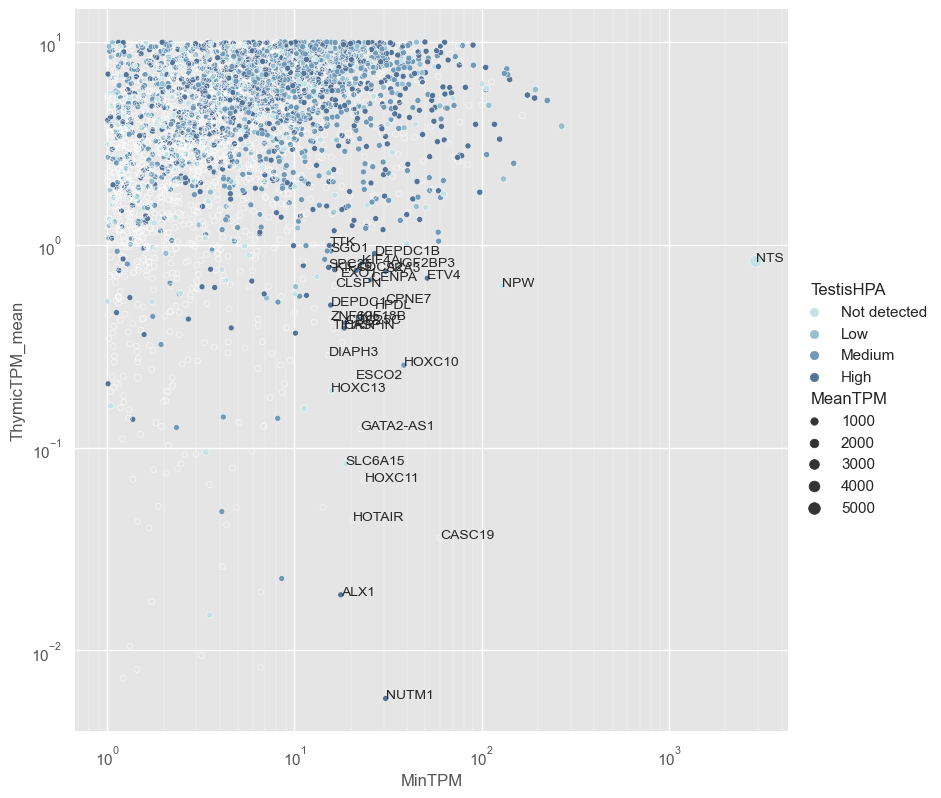

In [603]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

combined_with_thymus["MinTPM"] += 0.0001
combined_with_thymus["ThymicTPM_median"] += 0.0001

df_plot = combined_with_thymus[(combined_with_thymus.MinTPM > 1) & ((combined_with_thymus.ThymicTPM_mean < 10))]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.cubehelix_palette(rot=-.2))
    
varlist = [ 'MinTPM', 'ThymicTPM_mean']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        # fig = plt.figure(figsize=(20,16))
        g = sns.relplot(
            data=df_plot,
            x=x, y=y,
            hue="TestisHPA", size="MeanTPM",
            hue_order=["Not detected", "Low", "Medium", "High"],
            height=8,
           
        )
   
        g.set(xscale="log", yscale="log")
        ax = g.ax
        ax.xaxis.grid(True, "minor", linewidth=.25)
        # g.ax.yaxis.grid(True, "minor", linewidth=.25)
        g.despine(left=True, bottom=True)
        high = df_plot[
                (df_plot.MinTPM > 15) & (df_plot.ThymicTPM_mean < 1)
        ]
        for gene_name, xi, yi in sorted(zip(high.GeneName, high[x], high[y]), key=lambda x: x[1]):
            if xi > 20:
                print("%10s  %d (min TPM)" % (gene_name, int(np.round(xi))))
            ax.text(
                x=xi, 
                y=yi, 
                s=gene_name)
        fig = g.figure
        fig.savefig("Thymic-%s-%s.png" % (x, y))

In [645]:
df_cspa = pd.read_excel("CSPA.xlsx")
df_cspa["CSPA category"].value_counts()

/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


1 - high confidence    1039
2 - putative            247
3 - unspecific          206
Name: CSPA category, dtype: int64

In [701]:
df_cspa_confident = df_cspa[df_cspa["CSPA category"].str.contains("high")]
surface_gene_names = set(df_cspa_confident["ENTREZ gene symbol"]).union(df_cspa_confident["CD"])

In [702]:
len(surface_gene_names)

1180

NotTestisHPA MeanTPM
NotTestisHPA MinTPM
NotTestisHPA MaxTPM
TestisHPA MeanTPM
TestisHPA MinTPM
TestisHPA MaxTPM


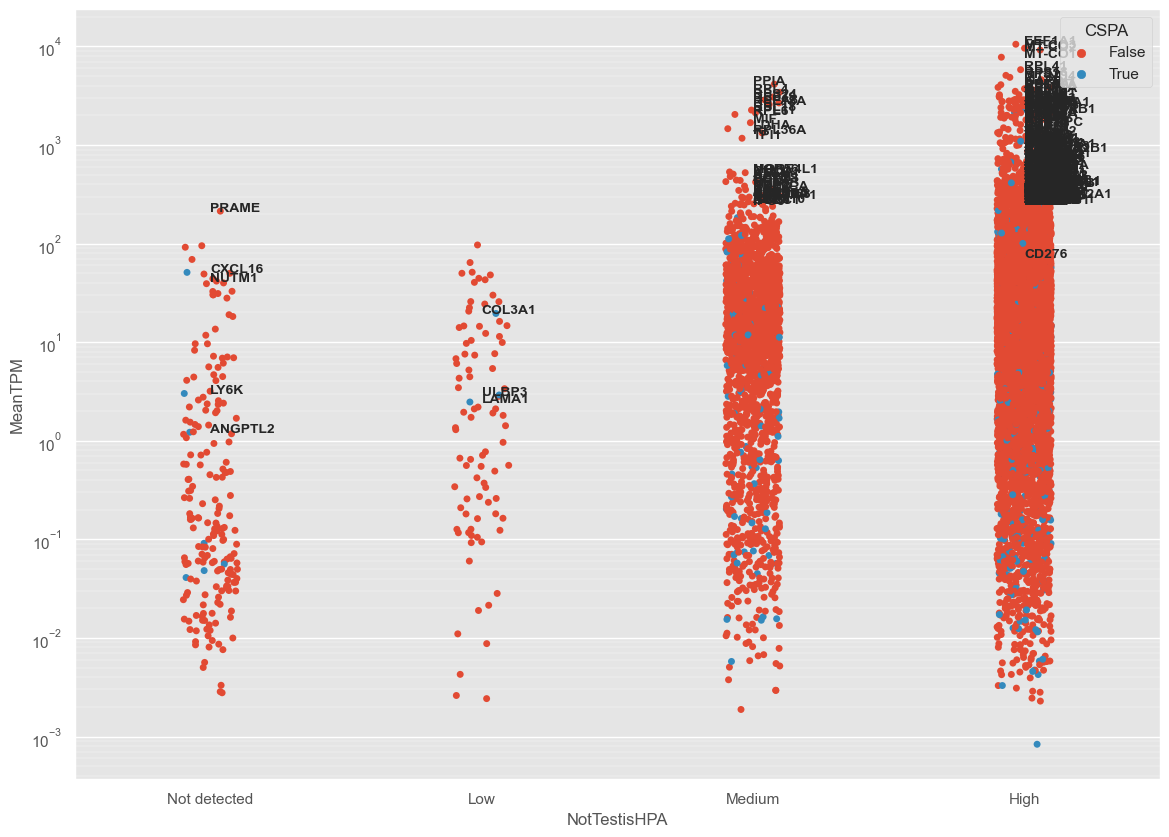

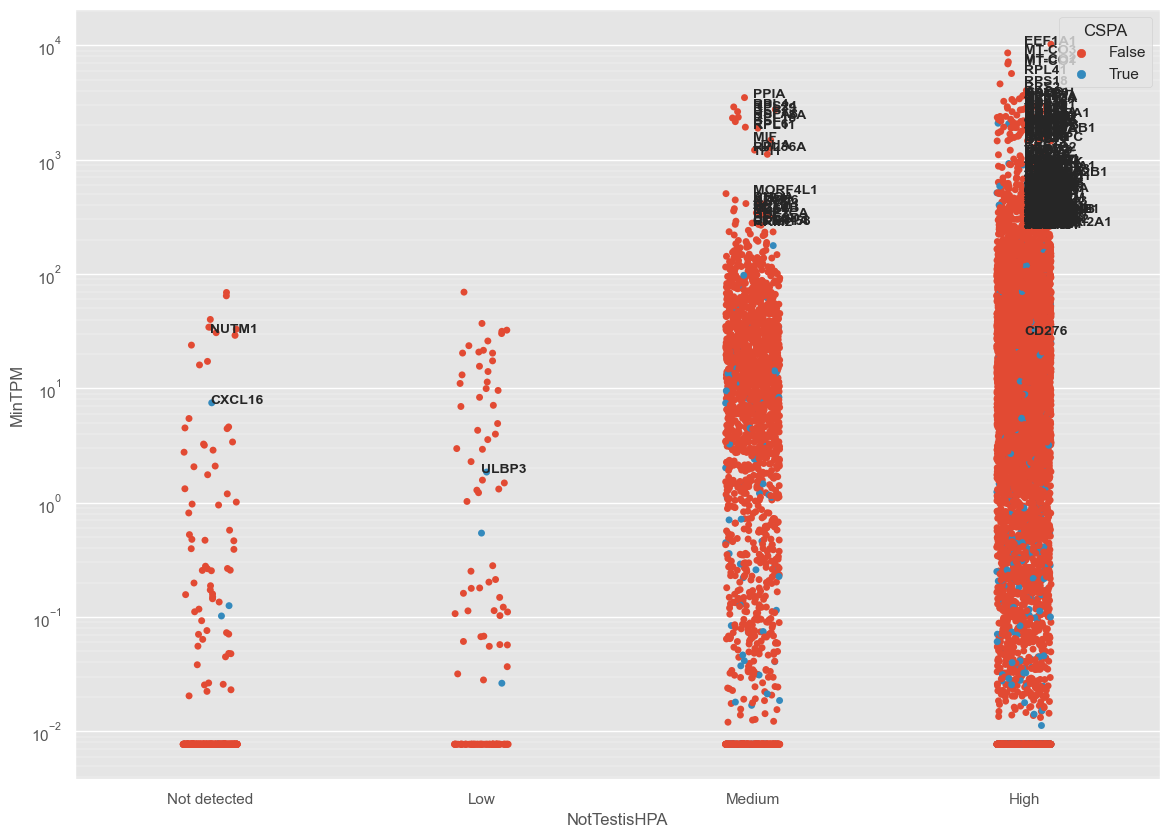

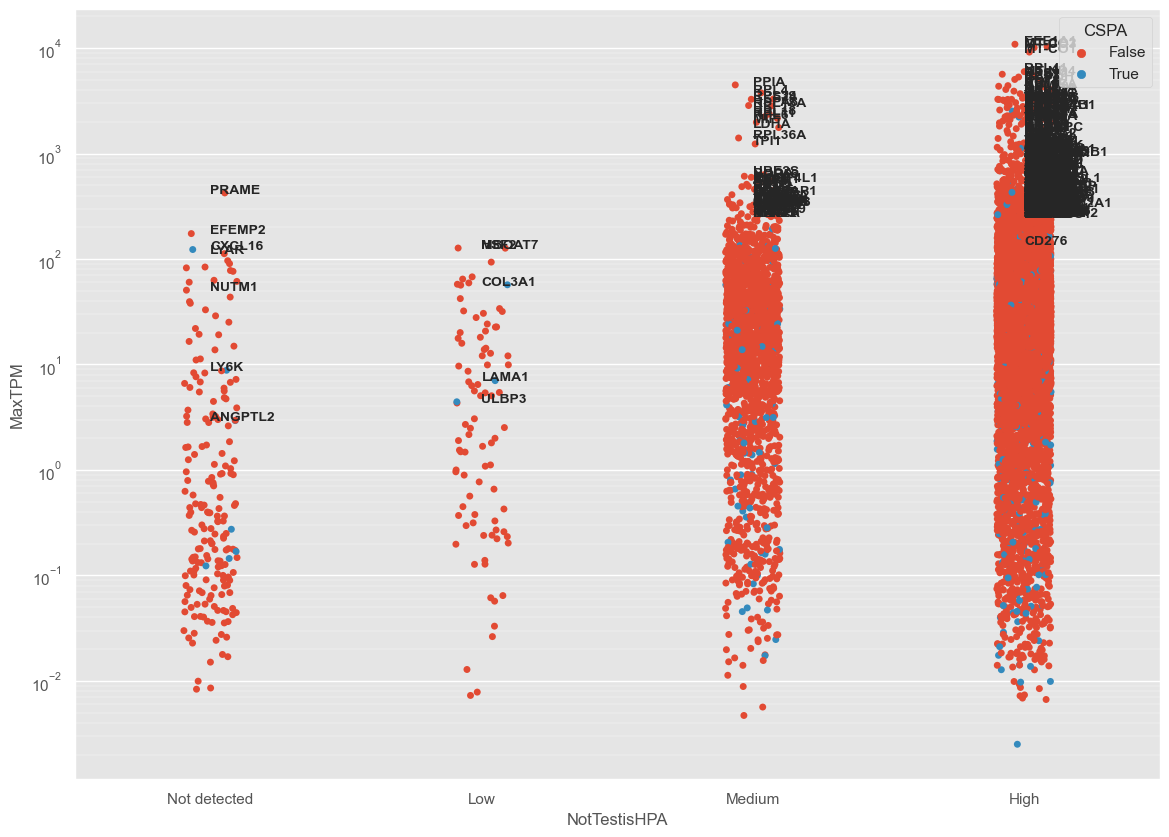

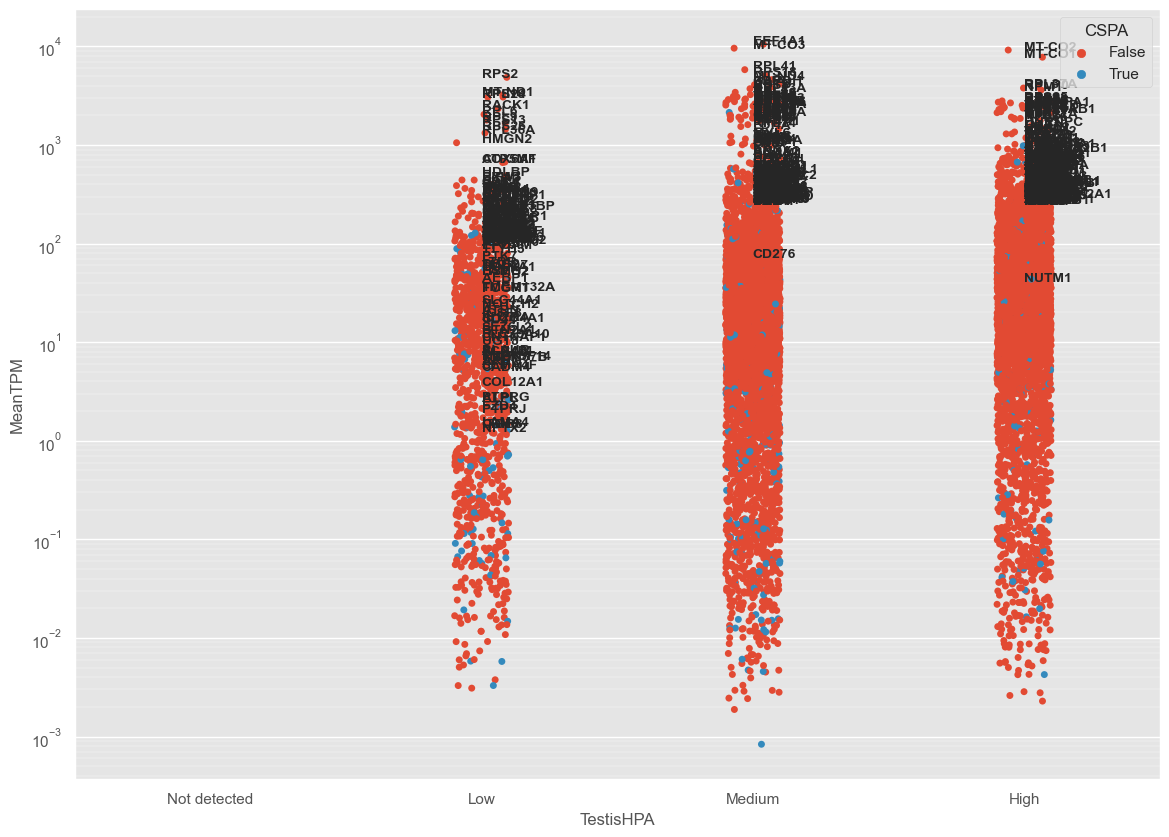

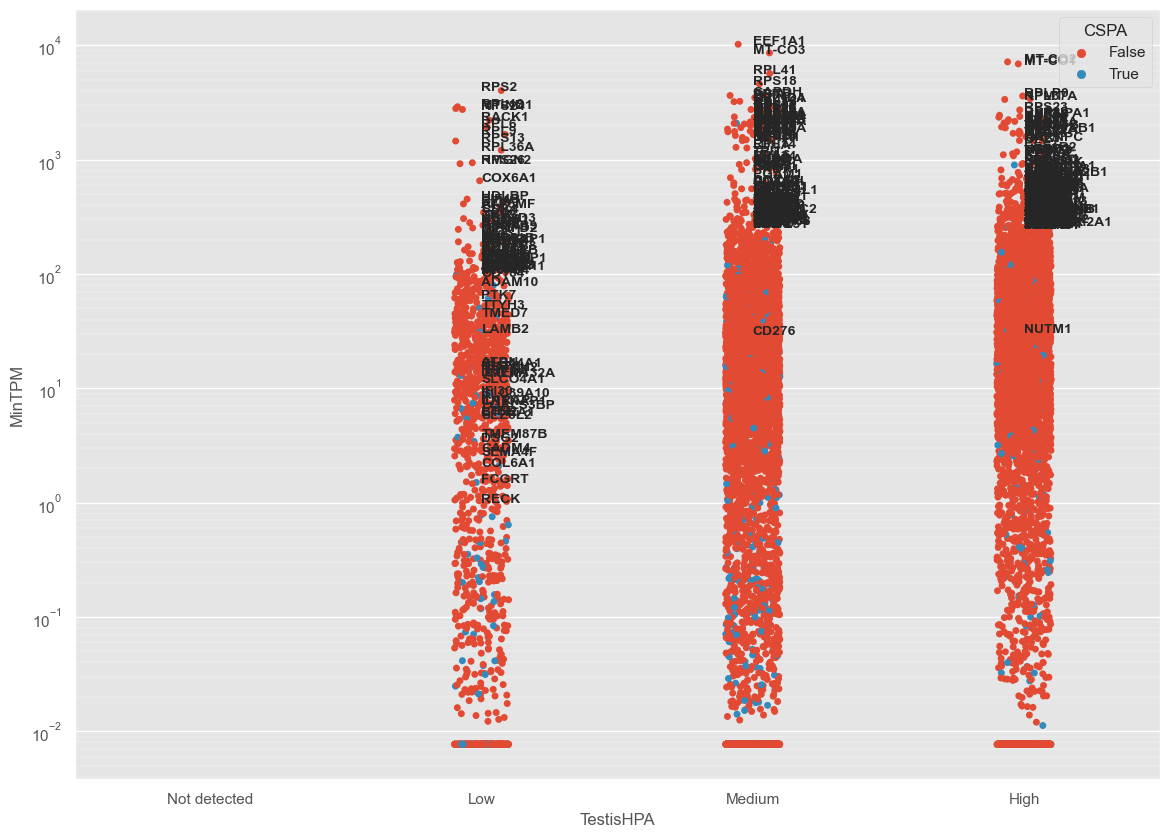

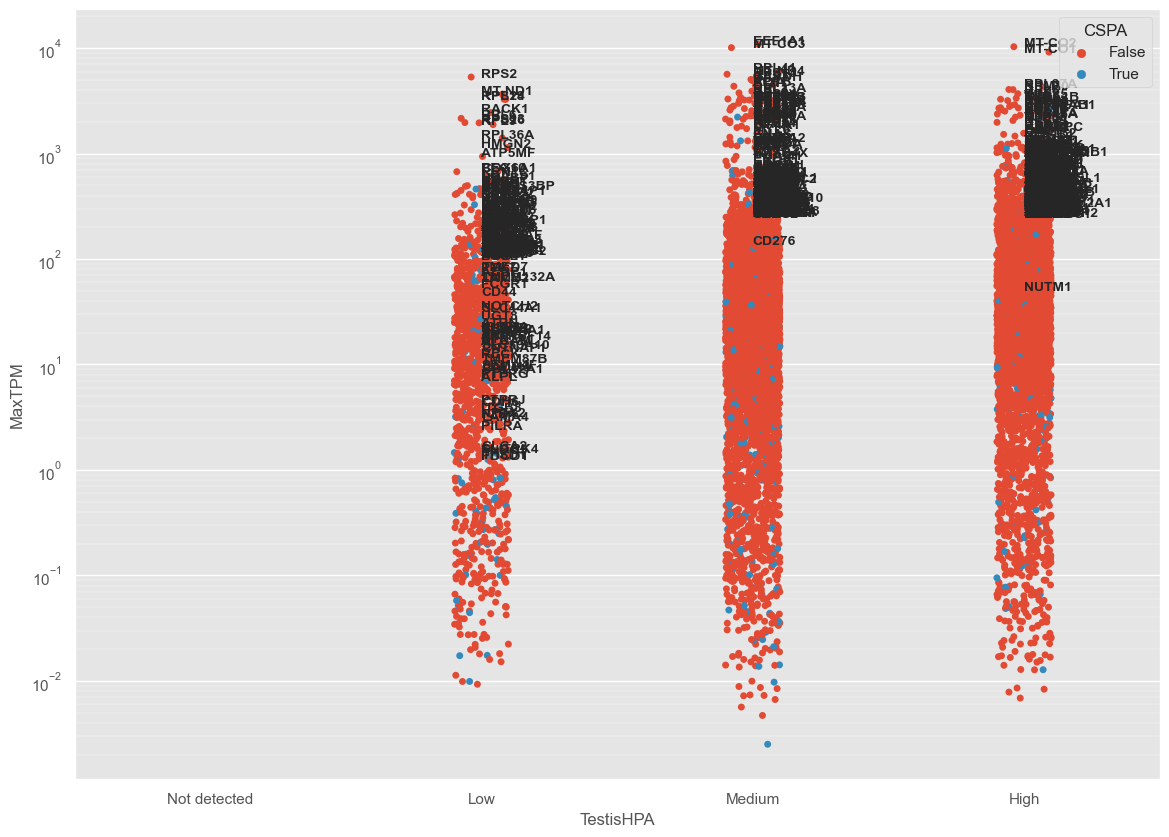

In [710]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.style.use('ggplot')

df_plot = combined_with_thymus[
    combined_with_thymus.TestisHPA.isin({"Low", "Medium", "High"})].copy()
df_plot["CSPA"] = df_plot.GeneName.isin(surface_gene_names)
    
# sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_palette(sns.light_palette(color="red"))

"""
varlist = [ 'MinTPM', 'ThymicTPM_mean']
for i, x in enumerate(varlist):
    for y in varlist[i+1:]:
        # fig = plt.figure(figsize=(20,16))
        g = sns.relplot(
            data=df_plot,
            x=x, y=y,
            hue="TestisHPA", size="MeanTPM",
            hue_order=["Not detected", "Low", "Medium", "High"],
            height=8,
           
        )
   
        g.set(xscale="linear", yscale="log")
        ax = g.ax
        ax.xaxis.grid(True, "minor", linewidth=.25)
        # g.ax.yaxis.grid(True, "minor", linewidth=.25)
        g.despine(left=True, bottom=True)
        high = df_plot[
            (df_plot.MinTPM > 10) | 
        
            (df_plot.ThymicTPM_median > 10)]
        for gene_name, xi, yi in sorted(zip(high.GeneName, high[x], high[y]), key=lambda x: x[1]):
            if xi > 20:
                print("%10s  %d (min TPM)" % (gene_name, int(np.round(xi))))
            ax.text(
                x=xi, 
                y=yi, 
                s=gene_name)
        fig = g.figure
        fig.savefig("TestisOnly-Thymic-%s-%s.png" % (x, y))
"""

catlist = [ 'NotTestisHPA', "TestisHPA"]
numlist = ['MeanTPM', "MinTPM", "MaxTPM"]
for i, x in enumerate(catlist):
    for j, y in enumerate(numlist):
        print(x, y)
        plt.figure()
        ax = sns.stripplot(data=df_plot, x=x, y=y, hue="CSPA", order=["Not detected", "Low", "Medium", "High"])
        plt.gca().set_yscale('log')
        ax.yaxis.grid(True, "minor", linewidth=.25)
        fig = ax.figure
        high = df_plot[df_plot.GeneName.str.contains("CD276", na=False) |
                       df_plot.GeneName.str.contains("NUTM1", na=False) |
                    ((df_plot[y] > 1) & df_plot.CSPA) |
                      (df_plot[y] > 100)]

        for gene_name, xi, yi in sorted(zip(high.GeneName, high[x], high[y]), key=lambda x: x[1]):
            if xi == "Not detected" or xi == "Low" or yi > 250 or gene_name in {"NUTM1", "CD276"}:
                ax.text(
                    x=xi, 
                    y=yi, 
                    s=gene_name, fontweight='bold')
    

        fig.savefig("CSPA-%s-%s.png" % (x, y))

In [704]:
gs = e109.genes_by_name("NUTM1")

In [705]:
len(gs[0].transcripts[-4].protein_sequence)

1160

In [706]:
len(gs[0].transcripts[-1].protein_sequence)

1132

In [707]:
gs = e109.genes_by_name("CD276")

In [708]:
gs

[Gene(gene_id='ENSG00000103855', gene_name='CD276', biotype='protein_coding', contig='15', start=73683966, end=73714514, strand='+', genome='GRCh38')]